In [2]:
!pip install torch
!pip install torch_geometric
!pip install torch_summary
!pip install networkx

!pip install pennylane-qiskit

!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 70.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 61.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 76.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.7/340.7 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 69.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.9 MB/s eta 0:

In [3]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical


# Load your channel gain data (assuming you have it in a CSV file)
df = pd.read_csv('/kaggle/input/weather-dataset/weather-010824-061024.csv', parse_dates=['ts_get'], index_col='ts_get')
heatmap_df = pd.read_csv('/kaggle/input/weather-dataset/weather-010824-061024.csv')

In [4]:
heatmap_df

,id,hum,pres,rain_1h,wind_speed,wind_deg,clouds_all,ts_get,max_temp,min_temp,ave_temp,cod_weather
0,41752,62,1013,0.0,1.54,360,0,2024-08-01 00:00:02,28.21,25.46,27.35,800
1,41753,60,1013,0.0,1.03,0,0,2024-08-01 01:00:01,27.66,24.81,26.85,800
2,41754,66,1013,0.0,1.54,10,0,2024-08-01 02:00:03,27.10,23.81,26.16,800
3,41755,61,1012,0.0,1.03,0,0,2024-08-01 03:00:02,25.97,23.79,24.97,800
4,41756,62,1013,0.0,1.54,50,0,2024-08-01 04:00:03,25.97,22.81,24.87,800
...,...,...,...,...,...,...,...,...,...,...,...,...
1653,43405,87,1013,0.0,3.09,340,20,2024-10-09 03:00:03,18.79,17.08,17.30,801
1654,43406,87,1012,0.0,2.06,340,97,2024-10-09 04:00:02,18.79,17.10,17.48,804
1655,43407,85,1012,0.0,1.03,0,97,2024-10-09 05:00:09,17.10,15.81,17.10,804
1656,43408,85,1013,0.0,1.03,60,0,2024-10-09 06:00:02,17.66,15.81,17.57,800


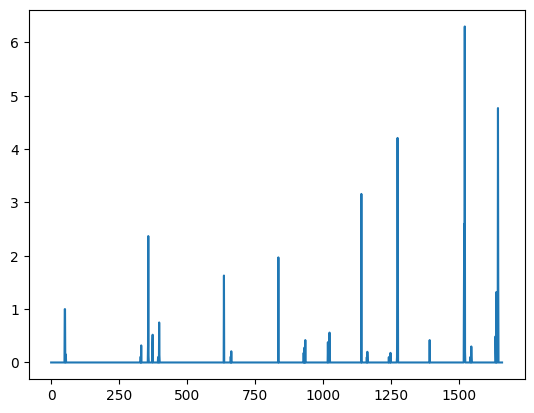

In [5]:
import matplotlib.pyplot as plt
rainfall = heatmap_df['rain_1h']
plt.plot(rainfall)
plt.show()

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) particularly well-suited for sequential data, making them an excellent choice for time-series prediction tasks like weather forecasting. Here’s how you can use LSTM for a rain alert system:

#### 1. Data Preparation
Sequential Data: Since LSTMs are designed for sequential data, you'll need to structure your dataset accordingly. For weather prediction, you could create sequences of historical data (e.g., using the last n hours or days of data).
Input Features: Use the specified dataset columns: hum, pres, rain_1h, wind_speed, wind_deg, clouds_all, max_temp, min_temp, and ave_temp.

In [6]:
import numpy as np

# Select relevant features
features = heatmap_df[['hum', 'pres', 'rain_1h', 'wind_speed', 'wind_deg', 'clouds_all', 'max_temp', 'min_temp', 'ave_temp']]


target = heatmap_df['rain_1h'] #.apply(categorize_rain)


# Create sequences for LSTM
def create_sequences(data, target, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(target[i + time_steps])  # Predict the next time step
    return np.array(X), np.array(y)

# Create sequences with time steps of 24
time_steps = 500

X_sequences, y_sequences = create_sequences(features.values, target.values, time_steps)



# Create sequences with the same function as before
X_sequences, y_sequences = create_sequences(features.values, target.values, time_steps)



In [7]:
# One-hot encode the target variable
#y_sequences = to_categorical(y_sequences, num_classes=4)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42, shuffle=False)



In [8]:
print(np.isnan(X_train).any(), np.isnan(y_train).any())

False False


In [9]:
# Build the LSTM model
# Build the LSTM model with Dropout
model = keras.Sequential([
    layers.LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.LSTM(32),
    layers.Dropout(0.2),  # Another Dropout layer
    layers.Dense(1)  # Output layer for multiclass classification
])

# Compile the model
model.compile(optimizer='adam', loss='mae')
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 500, 32)        │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,729 (53.63 KB)

 Trainable params: 13,729 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=20, validation_split=0.35)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 356ms/step - loss: 0.1637 - val_loss: 0.0920
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 357ms/step - loss: 0.0953 - val_loss: 0.0733
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - loss: 0.0830 - val_loss: 0.0492
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step - loss: 0.0523 - val_loss: 0.0474
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 357ms/step - loss: 0.0451 - val_loss: 0.0424
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step - loss: 0.0443 - val_loss: 0.0512
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 346ms/step - loss: 0.0411 - val_loss: 0.0422
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 356ms/step - loss: 0.0414 - val_loss: 0.0534
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 336ms/step - loss: 0.0332 - val_loss: 0.0401
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step - loss: 0.0266 - val_loss: 0.0407
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 353ms/step - loss: 0.0340 - val_loss: 0.0455
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 20

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)  # Get the class with the highest probability


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0696


TypeError: cannot unpack non-iterable float object

In [51]:
history.history

{'loss': [0.09007074683904648,
  0.049830809235572815,
  0.03611760959029198,
  0.03110109269618988,
  0.027102811262011528,
  0.02433784492313862,
  0.022387957200407982,
  0.02008099853992462,
  0.019166678190231323,
  0.01773400418460369,
  0.017256591469049454,
  0.01597652956843376,
  0.015833698213100433,
  0.01523482147604227,
  0.014811958186328411,
  0.014894404448568821,
  0.014448846690356731,
  0.014109293930232525,
  0.014276783913373947,
  0.012973477132618427,
  0.01295260339975357,
  0.012848393991589546,
  0.012747623957693577,
  0.012499827891588211,
  0.01258295588195324,
  0.012112014926970005,
  0.01210323628038168,
  0.012078607454895973,
  0.011771909892559052,
  0.01188657246530056,
  0.012073003686964512,
  0.011650389060378075,
  0.01153181679546833,
  0.01131409965455532,
  0.011321483179926872,
  0.011266506277024746,
  0.011455767787992954,
  0.011520574800670147,
  0.01114355307072401,
  0.011262256652116776,
  0.011169403791427612,
  0.011119798757135868,

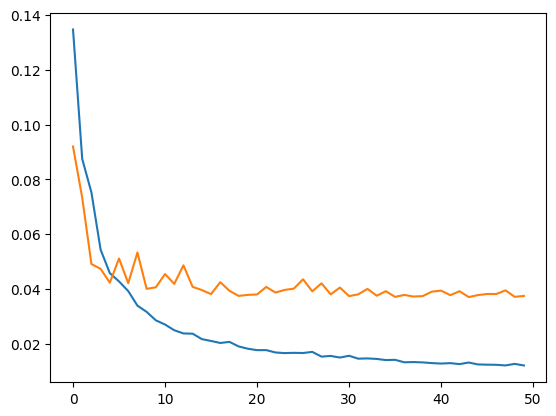

In [12]:



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
